In [ ]:
#install librosa
!pip install librosa
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Pre-processing audio files and computing mel-spectrogram and audio plots 

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import warnings
import soundfile as sf
warnings.filterwarnings('ignore')

In [ ]:
# Read .ogg audio files
def read_audio(path):
    y, sr = librosa.load(path, sr=16000)
    return y, sr

# Plot audio signal
def plot_audio(y, sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.show()

# Plot spectrogram
def plot_spectrogram(y, sr):
    plt.figure(figsize=(14, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Plot mel-spectrogram
def plot_melspectrogram(y, sr):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, n_mels=128, fmax=8000, hop_length=512)  
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

#Save mel-spectrogram
def save_melspectrogram(y, sr, name, save_dir):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, n_mels=128, fmax=8000, hop_length=512)  
    log_S = librosa.power_to_db(S, ref=np.max)
    #Librosa display without color bar
    librosa.display.specshow(log_S, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    #Save without axs
    plt.axis('off')

    #Remove white space
    plt.tight_layout()

    #Resize image to 224 x 224
    #plt.gcf().set_size_inches(2.24, 2.24)
    
    #save without color bar
    plt.savefig(save_dir + name + '.png', bbox_inches='tight', transparent=True, pad_inches=0.0)
    plt.close()

#save audio signal plot
def save_audio_plot(y, sr, name, save_dir):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.tight_layout()
    #plt.gcf().set_size_inches(2.24, 2.24)

    plt.savefig(save_dir + name + '.png', bbox_inches='tight', pad_inches=0.0)
    plt.close()


In [ ]:
#Loop through all audio files and convert them to 16 kHz 16-bit single channel with librosa
for root, dirs, files in os.walk("/content/drive/MyDrive/Voice recordings ICT4D"):
    for file in files:
        if file.endswith(".ogg") or file.endswith(".wav") or file.endswith(".m4a"):
            path = os.path.join(root, file)
            y, sr = read_audio(path)
            print(path)
            
            y_pitch_up = librosa.effects.pitch_shift(y= y, sr = sr, n_steps=3)

            y_pitch_down = librosa.effects.pitch_shift(y= y, sr = sr, n_steps=-3)

            y_noise = y + 0.001*np.random.normal(0,1,len(y))

            y_pitch_down_noise = y_pitch_down + 0.005*np.random.normal(0,1,len(y_pitch_down))

            y_pitch_up_noise = y_pitch_up + 0.005*np.random.normal(0,1,len(y_pitch_up))


            #Get class name from path
            class_name = path.split("/")[-2]


            #Save mel-spectrogram
            #Create directory if it does not exit yet
            if not os.path.exists("/content/drive/MyDrive/melspectrograms/" + class_name + "/"):
                os.makedirs("/content/drive/MyDrive/melspectrograms/" + class_name + "/")

            if not os.path.exists("/content/drive/MyDrive/melspectrograms/" + class_name + "/" + file[:-4] + ".png"):
              save_melspectrogram(y, sr, file[:-4], "/content/drive/MyDrive/melspectrograms/" + class_name + "/")
              save_melspectrogram(y_pitch_up, sr, file[:-4] + "_pitch_up", "/content/drive/MyDrive/melspectrograms/" + class_name + "/")
              save_melspectrogram(y_pitch_down, sr, file[:-4] + "_pitch_down", "/content/drive/MyDrive/melspectrograms/" + class_name + "/")
              save_melspectrogram(y_noise, sr, file[:-4] + "_noise", "/content/drive/MyDrive/melspectrograms/" + class_name + "/")
              save_melspectrogram(y_pitch_down_noise, sr, file[:-4] + "_pitch_down_noise", "/content/drive/MyDrive/melspectrograms/" + class_name + "/")
              save_melspectrogram(y_pitch_up_noise, sr, file[:-4] + "_pitch_up_noise", "/content/drive/MyDrive/melspectrograms/" + class_name + "/")

            #Save audio signal plot
            #Create directory if it does not exit yet
            if not os.path.exists("/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/"):
                os.makedirs("/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/")

            if not os.path.exists("/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + ".png"):
              save_audio_plot(y, sr, file[:-4], "/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/")
              save_audio_plot(y_pitch_up, sr, file[:-4] + "_pitch_up", "/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/")
              save_audio_plot(y_pitch_down, sr, file[:-4] + "_pitch_down", "/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/")
              save_audio_plot(y_noise, sr, file[:-4] + "_noise", "/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/")
              save_audio_plot(y_pitch_down_noise, sr, file[:-4] + "_pitch_down_noise", "/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/")
              save_audio_plot(y_pitch_up_noise, sr, file[:-4] + "_pitch_up_noise", "/content/drive/MyDrive/audio_plots/" + class_name + "/" + file[:-4] + "/")

/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_1.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_2.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_3.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_4.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_5.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_6.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_7.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_8.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_9.m4a
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_10.m4a
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_11.m4a
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_12.m4a
/content/drive/MyDrive/Voice recordings ICT4D/Peanut/Peanut_13.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Fonio/Fonio_1.ogg
/content/drive/MyDrive/Voice recordings ICT4D/Fonio/Fonio_2.ogg
/content/d

### Loading the data

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset


In [ ]:
#Load image dataset in pytorch
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms


class MelSpectrumDataset(Dataset):
    def __init__(self, root_dir, transform):
        self.root_dir = root_dir
        self.labels = sorted(os.listdir(root_dir))
        self.transform = transform
        #Get mapping of labels to integers
        self.label_to_int = {label: i for i, label in enumerate(self.labels)}

        #int to label mapping
        self.label_mapping = {i: label for i, label in enumerate(self.labels)}



    def __len__(self):
        return sum(len(os.listdir(os.path.join(self.root_dir, label))) for label in self.labels)

    def __getitem__(self, idx):
        label_idx = 0
        while idx >= len(os.listdir(os.path.join(self.root_dir, self.labels[label_idx]))):
            idx -= len(os.listdir(os.path.join(self.root_dir, self.labels[label_idx])))
            label_idx += 1
        label = self.labels[label_idx]
        label_path = os.path.join(self.root_dir, label)
        image_name = sorted(os.listdir(label_path))[idx]
        image_path = os.path.join(label_path, image_name)
        image = Image.open(image_path).convert("RGB")
        # Perform any necessary image preprocessing here
        image = self.transform(image)
        # e.g., resizing, normalizing, etc.
        return image, self.label_to_int[label]


root_dir = '/content/drive/MyDrive/ICT4D/melspectrograms/'

transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(), # Convert the images to PyTorch tensors
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

fine_tuning_set = MelSpectrumDataset(root_dir, transform)
image, label = fine_tuning_set[0]

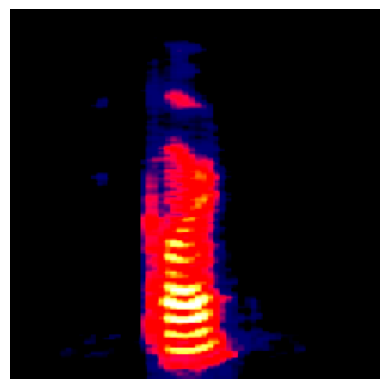

In [ ]:
#Display pytorch image
image_np = image.permute(1, 2, 0).numpy()

# Display the image using matplotlib
plt.imshow(image_np)
plt.axis('off')
plt.show()

### Fine-tuning the model

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wandb
wandb.login(key='6fbe3a2bb5c910a6a87fbaae82f15d05fd0632ac')
project_name = 'diffusion-detection'

wandb: Currently logged in as: colombosimone98 (ict4d). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import timm
import torch.nn  as nn
import tqdm
import copy

#Set random seeds
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)

In [ ]:
class ConvNeXt(nn.Module):
    def __init__(self):
        super(ConvNeXt, self).__init__()
        self.base_model = timm.create_model('convnext_small', pretrained=True, in_chans=3, num_classes=10, drop_rate=0.3)
        self.in_features = self.base_model.get_classifier().in_features
        print(self.in_features)
        self.base_model.fc = nn.Sequential(
            nn.BatchNorm1d(self.in_features), 
            nn.Linear(in_features=self.in_features, out_features = 512, bias=False), 
            nn.ReLU(),
            nn.BatchNorm1d(512), 
            nn.Dropout(0.5),
            nn.Linear(in_features=512, out_features=10, bias=False)
        )
        #self.fc0 = nn.Linear(512,128)
        #self.drp = nn.Dropout(0.5)
        #self.fc1 = nn.Linear(128, 10)
        #self.relu = nn.ReLU()
        #self.softmax = nn.Softmax()
        
    def forward(self, input):
        outputs = self.base_model(input)
        #outputs = self.drp(self.relu(self.fc(outputs))) 
        #outputs = self.drp(self.relu(self.fc0(outputs)))
        #outputs = self.softmax(self.fc1(outputs))
        return outputs

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvNeXt().to(device)

"""
#Freeze backbone weights
for param in model.base_model.parameters():
    param.requires_grad = False

#Fine-tune the last fc layer
for param in model.fc.parameters():
    param.requires_grad = True

for param in model.fc0.parameters():
    param.requires_grad = True

for param in model.fc1.parameters():
    param.requires_grad = True
"""
#Define loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)

#Split data in train and validation set and test set
from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(fine_tuning_set, test_size=0.1, random_state=42, shuffle=True)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=16, shuffle=True)


def train_validate_model(model, criterion, optimizer, num_epochs=300):
    loss_list = []
    acc_list = []

    best_val_acc = 0.0
    best_model = None
    patience = 5
    patience_counter = 0
    avg_loss_val,avg_acc_val = [],[]
    wandb.init(project=project_name, name = '19 samples fine-tuning 10-classes ConvNeXt layerNorm in head')
    for epoch in tqdm.tqdm(range(num_epochs)):

        model.train()
        for i, (images, labels) in enumerate(train_loader):
            # Run the forward pass

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss_list.append(loss.item())

            # Backprop and perform Adam optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track the accuracy
            total = labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            acc_list.append(correct / total)

            wandb.log({'train_loss_step':  loss.item(), 'train_acc_step':(correct / total)})

        wandb.log({'train_loss':  np.mean(loss_list), 'train_acc':np.mean(acc_list)})
        
        #Validate the model
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                accuracy =  correct / total
                avg_loss_val.append(loss.item())
                avg_acc_val.append(accuracy)
                
            if np.mean(avg_acc_val) > best_val_acc:
                best_val_acc = np.mean(avg_acc_val)
                best_model = copy.deepcopy(model.state_dict())
                patience_counter = 0
            else:
                patience_counter += 1
            
            # Check if the training process should be stopped early
            if patience_counter == patience:
                break

        wandb.log({'val_loss_step': np.mean(avg_loss_val), 'val_acc_step':np.mean(avg_acc_val)}) 
                        
    if best_model != None:
        torch.save(best_model, 'model_checkpoint.ckpt')
    else:
        torch.save(model.state_dict(), 'model_checkpoint.ckpt')    
    
#Train the model
train_validate_model(model, criterion, optimizer, num_epochs=300)

768


100%|██████████| 300/300 [2:44:15<00:00, 32.85s/it]


In [ ]:
wandb.finish()

768


{0: 'Corn', 1: 'Cowpea', 2: 'Fonio', 3: 'Millet', 4: 'Okra', 5: 'Peanut', 6: 'Rice', 7: 'Sesame', 8: 'Sorghum', 9: 'Soy'}


test_acc_mean,▁
test_acc_mean,0.8803


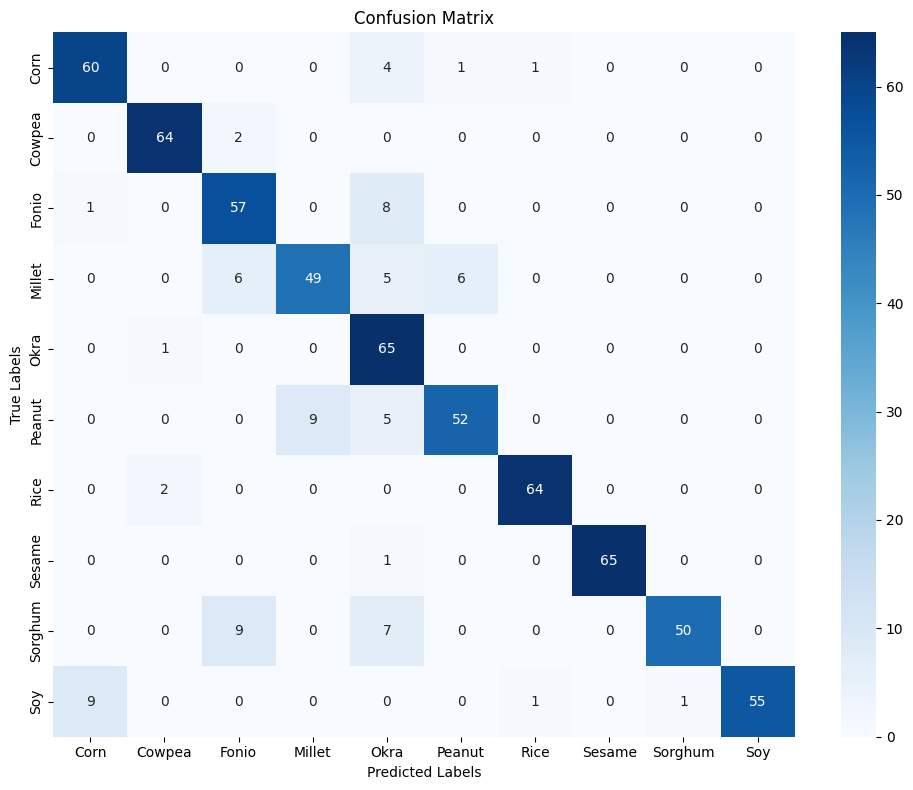

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#Test model on a single image 
root_dir = '/content/drive/MyDrive/Voice recordings ICT4D/melspectrograms_test'
test_set = MelSpectrumDataset(root_dir, transform)
image, label = test_set[0]   
model = ConvNeXt().to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/Voice recordings ICT4D/model_checkpoint.ckpt'))
#Test model `

model.eval()
with torch.no_grad():
    #Test model on test set
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=True)

    correct = 0
    total = 0

    wandb.init(project=project_name, name='evaluating best model checkpoint')
    label_predictions = []
    label_mapping = test_set.label_mapping
    print(label_mapping)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Append labels and predictions to the list
        label_predictions.extend(zip(labels.tolist(), predicted.tolist()))

    # Create a dataframe from the list
    df = pd.DataFrame(label_predictions, columns=['labels', 'predictions'])

    # Log the dataframe
    wandb.log({'label_predictions': wandb.Table(dataframe=df)})

    # Create numpy arrays for labels and predictions
    true_labels = np.array([label_mapping[label] for label in df['labels']])
    predicted_labels = np.array([label_mapping[label] for label in df['predictions']])

    # Get unique label names
    label_names = list(label_mapping.values())

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=label_names)

    # Convert confusion matrix to DataFrame
    cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.tight_layout()

    # Log the confusion matrix as an image
    wandb.log({'confusion_matrix': wandb.Image(plt)})

    # Calculate mean test accuracy
    test_acc = correct / total
    wandb.log({'test_acc_mean': test_acc})
wandb.finish()